In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor/2/1231.png

/kaggle/input/brain-tumor/2/641.png

/kaggle/input/brain-tumor/2/1088.png

/kaggle/input/brain-tumor/2/173.png

/kaggle/input/brain-tumor/2/1958.png

/kaggle/input/brain-tumor/2/815.png

/kaggle/input/brain-tumor/2/491.png

/kaggle/input/brain-tumor/2/1924.png

/kaggle/input/brain-tumor/2/1084.png

/kaggle/input/brain-tumor/2/718.png

/kaggle/input/brain-tumor/2/709.png

/kaggle/input/brain-tumor/2/889.png

/kaggle/input/brain-tumor/2/379.png

/kaggle/input/brain-tumor/2/780.png

/kaggle/input/brain-tumor/2/248.png

/kaggle/input/brain-tumor/2/94.png

/kaggle/input/brain-tumor/2/480.png

/kaggle/input/brain-tumor/2/1145.png

/kaggle/input/brain-tumor/2/1944.png

/kaggle/input/brain-tumor/2/236.png

/kaggle/input/brain-tumor/2/1343.png

/kaggle/input/brain-tumor/2/771.png

/kaggle/input/brain-tumor/2/675.png

/kaggle/input/brain-tumor/2/340.png

/kaggle/input/brain-tumor/2/48.png

/kaggle/input/brain-tumor/2/1948.png

/kaggle/input/brain-tumor/2/187

Import libraries for data visualization, image processing, and machine learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import shutil

from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import load_model

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dropout, MaxPool2D , Activation, Flatten, Dense, AvgPool2D, Lambda, BatchNormalization, Input

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

Install the visualkeras and openpyxl Python packages using pip. visualkeras is a library for creating visualizations of Keras models.

In [3]:
!pip install visualkeras
!pip install openpyxl






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 15.4 MB/s eta 0:00:00a 0:00:01










In [5]:
#Import some more libraries
import visualkeras
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import classification_report
import torch

Define data_dir as the path to the directory containing brain tumor image data. It then creates a list of class names from the subdirectories in data_dir. The code then uses list comprehension to create image_files, which is a list of lists containing the full paths to each image file in each class directory.

In [6]:
data_dir = '../input/brain-tumor' 
class_names = os.listdir(data_dir)
num_class = len(class_names)
image_files = [[os.path.join(data_dir, class_name, x) 
               for x in os.listdir(os.path.join(data_dir, class_name))] 
               for class_name in class_names]

Create two dictionaries, normal_mapping and reverse_mapping, using the zip and dict functions. normal_mapping maps the values in Name list to the values in N list, while reverse_mapping maps the values in N list to the values in Name list. The dictionaries are used to map the class labels to their corresponding numerical values and vice versa.

In [7]:
N=['1','2','3']
Name=[ 'meningioma','glioma','pituitary tumor' ]
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

Creates two empty lists, image_file_list and image_label_list. It then uses a for loop and enumerate function to iterate over the class_names and image_files lists, and appends the full paths of each image file to image_file_list and the corresponding class label to image_label_list. Finally, it calculates the total number of images in the dataset by getting the length of image_label_list.

In [8]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)

In [9]:
image_width, image_height = Image.open(image_file_list[0]).size

print('Total image count:', num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", class_names)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 3064

Image dimensions: 512 x 512

Label names: ['2', '3', '1']

Label counts: [1426, 930, 708]


Randomly select 9 images from the dataset and display them with their corresponding class labels.

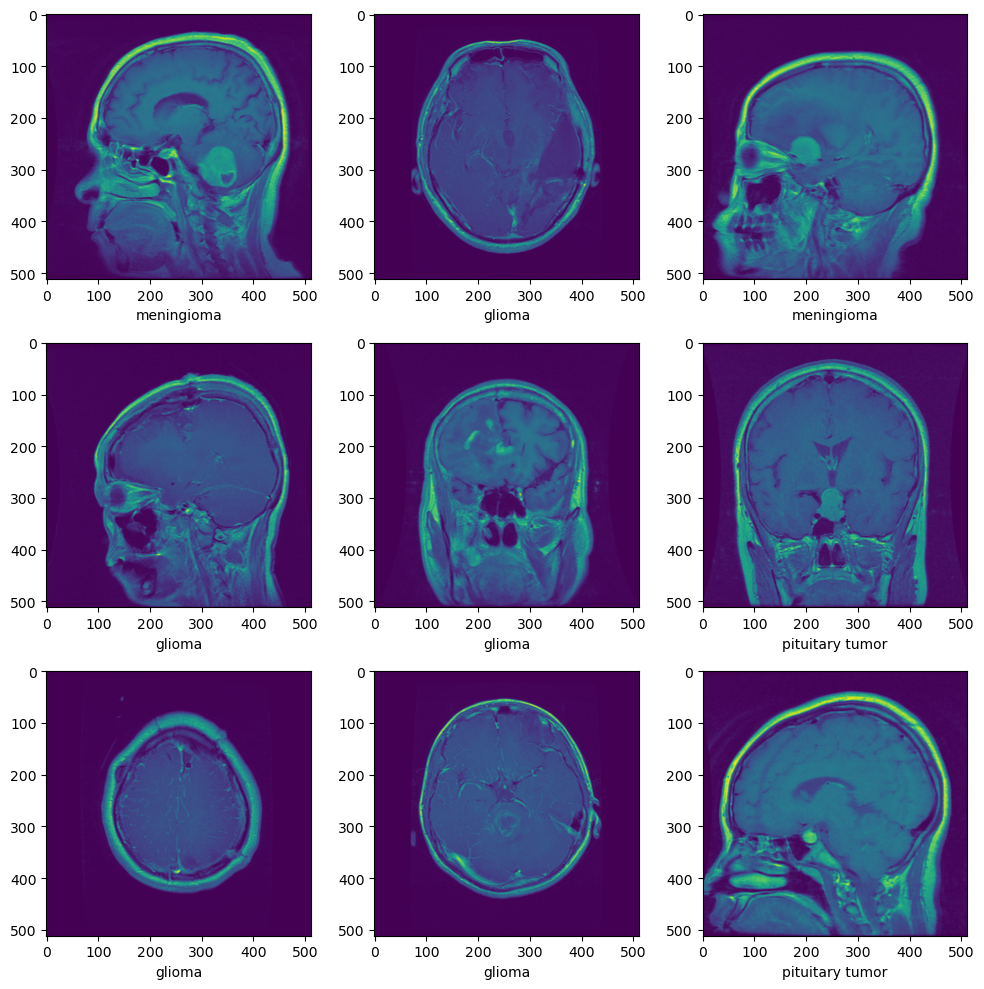

In [10]:
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(3,3, i+1)
    plt.xlabel(reverse_mapping[class_names[image_label_list[k]]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [11]:
len(image_file_list)

3064

In [12]:
len(image_label_list)

3064

In [13]:
set(image_label_list)

{0, 1, 2}

In [15]:
#Create df
data_df = pd.DataFrame({'image_file_path': image_file_list, 'label': image_label_list})

In [16]:
data_df.head(5)

image_file_path  label
0  ../input/brain-tumor/2/1231.png      0
1   ../input/brain-tumor/2/641.png      0
2  ../input/brain-tumor/2/1088.png      0
3   ../input/brain-tumor/2/173.png      0
4  ../input/brain-tumor/2/1958.png      0

In [17]:
data_df.isna().sum()

image_file_path    0
label              0
dtype: int64

<AxesSubplot:>

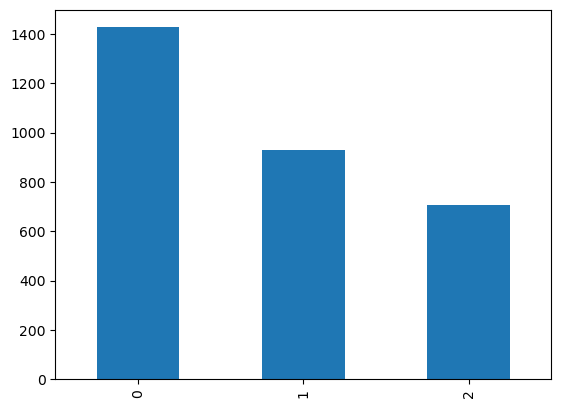

In [18]:
#Visualize the class imbalance
data_df["label"].value_counts().plot.bar()

In [19]:
#All the images are having same dimensions
for img_path in data_df["image_file_path"][:10]:
    print(Image.open(img_path).size)

(512, 512)

(512, 512)

(512, 512)

(512, 512)

(512, 512)

(512, 512)

(512, 512)

(512, 512)

(512, 512)

(512, 512)


**Common parameters for all the models**

Create a list of evaluation metrics to be used during the training and evaluation of a binary classification model. The list contains several standard metrics such as accuracy, precision, and recall, as well as true/false positives and negatives. These metrics help to measure the performance of the model during training and testing.

In [20]:
evaluation_metrics = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

Plot a confusion matrix for a classification model

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Generate a heatmap that highlights the regions of the input image that contributed the most towards the final prediction of a model. The function takes as input the input image array, the model and the name of the last convolutional layer in the model, and outputs the generated heatmap. It works by computing the gradient of the output class with respect to the activations of the last convolutional layer, and then multiplying these gradients by the last convolutional layer activations to obtain the heatmap.

In [22]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        class_channel = preds[:, 0]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()
    heatmap_resized = resize(heatmap,(320, 256))
    return heatmap_resized

In [23]:
N=[0,1,2]
reverse_mapping=dict(zip(N,Name))
reverse_mapping

{0: 'meningioma', 1: 'glioma', 2: 'pituitary tumor'}

In [24]:
data_df['label'] = data_df['label'].map(reverse_mapping).fillna(data_df['label'])

In [25]:
data_df.head(2)

image_file_path       label
0  ../input/brain-tumor/2/1231.png  meningioma
1   ../input/brain-tumor/2/641.png  meningioma

Splits the DataFrame data_df into three datasets: train, validation, and test. The train dataset will contain 68% of the original data, the validation dataset will contain 12%, and the test dataset will contain 20%. The shuffle parameter shuffles the data before splitting, and the random_state parameter sets the random seed for reproducibility

**Train test split**

In [26]:
train_val_dataset, test_dataset = train_test_split(data_df, test_size=0.2, shuffle=True, random_state=42)

**Train Validation Set split**

In [27]:
train_dataset, val_dataset = train_test_split(train_val_dataset, test_size=0.15, shuffle=True, random_state=42)

Defines two image data generators for training and testing. The training generator applies data augmentation techniques like rotation, shifting, flipping, zooming, and brightness changes to the input images, while the testing generator only applies image rescaling and normalization. Both generators rescale the pixel values of the input images to the range [0, 1], and the training generator also applies feature-wise centering and standardization.

In [28]:
train_generator = ImageDataGenerator(rescale=1./255,
                                  rotation_range=90,
                                  width_shift_range=0.15,
                                  height_shift_range=0.15,
                                  horizontal_flip=True,
                                  brightness_range=(0.8, 1.2),
                                  zoom_range=[0.75, 1],
                                  featurewise_center=True,
                                  featurewise_std_normalization=True)

test_generator = ImageDataGenerator(rescale=1./255, featurewise_std_normalization=True)

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1461: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.

  "This ImageDataGenerator specifies "


Define generators for training, validation, and test sets using the ImageDataGenerator function provided by Keras. The generators are created by providing data in the form of dataframes and specifying various parameters such as target size, batch size, shuffle, and class mode. These generators can be used to feed images and labels into a deep-learning model during training and evaluation

In [29]:
train_img_gen = train_generator.flow_from_dataframe(
    dataframe=train_dataset,
    #directory=train_set_folder_path,
    x_col='image_file_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=64,
    seed=2022,
    shuffle=True,
    class_mode='categorical'
)

Found 2083 validated image filenames belonging to 3 classes.


In [30]:
val_img_gen = train_generator.flow_from_dataframe(
    dataframe=val_dataset,
    #directory=train_set_folder_path,
    x_col='image_file_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=64,
    seed=2022,
    shuffle=True,
    class_mode='categorical'
)

Found 368 validated image filenames belonging to 3 classes.


In [31]:
test_img_gen = test_generator.flow_from_dataframe(
                                              dataframe=test_dataset,
                                              #directory=test_set_folder_path,
                                              x_col='image_file_path',
                                              y_col='label',
                                              target_size=(256, 256),
                                              batch_size=64,
                                              seed=2022,
                                              shuffle=False)

Found 613 validated image filenames belonging to 3 classes.


Generate two subplots, each containing 5 images. The first subplot displays 5 images from the training set, while the second subplot displays 5 images from the test set. The images are obtained by calling the next() method on the train_img_gen and test_img_gen generators and accessing the first image in the batch.

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

  "This ImageDataGenerator specifies "

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

  "This ImageDataGenerator specifies "


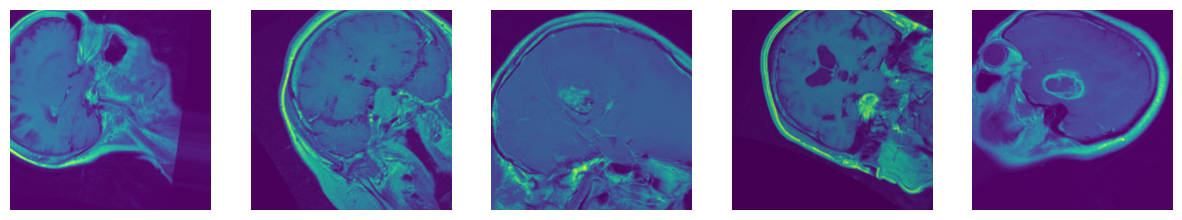

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
for i in range(5):
	image = next(train_img_gen)[0][0]
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

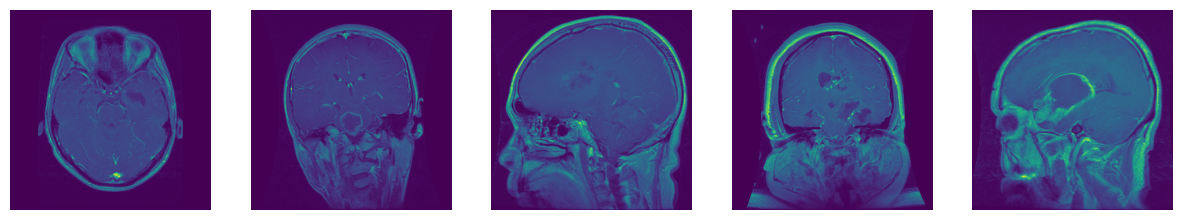

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
for i in range(5):
	image = next(test_img_gen)[0][0]
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

**Create a model from scratch**

EarlyStopping is a callback that monitors the validation loss and stops the training process if the loss stops improving after a certain number of epochs (patience).
ModelCheckpoint saves the model weights to the specified location whenever there is an improvement in validation loss.
LearningRateScheduler is a callback that changes the learning rate of the optimizer based on the epoch number. In this case, it divides the learning rate by 2 every 5 epochs.

In [34]:
#From professor's notebook

model_path = "/kaggle/working/best_model_tumor_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

monitor = tf.keras.callbacks.ModelCheckpoint(model_path, 
                                             monitor='val_loss',\
                                             verbose=1,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def schedule(epoch, lr):
    if epoch%5== 0 and epoch!=0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(schedule,verbose = 1)

model_callbacks = [
    early_stop, lr_schedule, 
    monitor]

Define the Sequential model in Keras with a series of Conv2D layers and dense layers. The model takes 256x256x3 input images and applies a series of convolutional layers with ReLU activation, pooling, dropout, and dense layers with ReLU activation. The output layer has 3 units with softmax activation for multiclass classification.

In [35]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

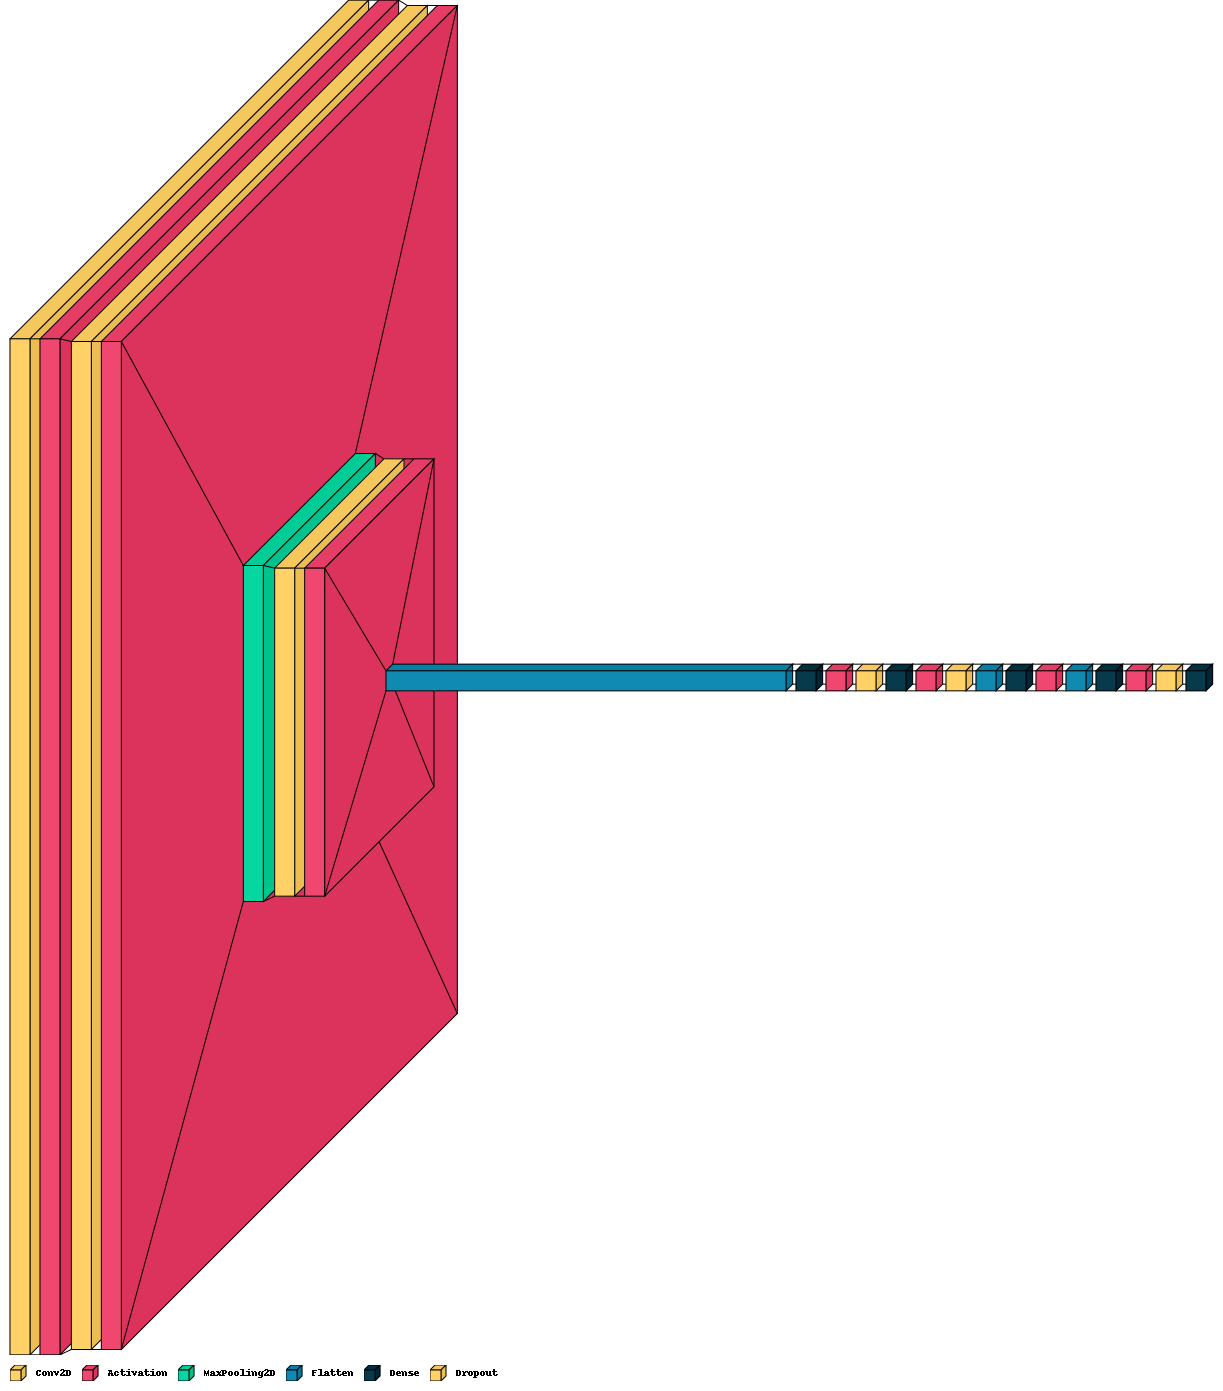

In [36]:
from PIL import ImageFont
# font = ImageFont.truetype("../input/arialfont/arial.ttf", 12)
visualkeras.layered_view(model, to_file='model_architecture.png', legend=True
#                          , font=font
                        )

In [37]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 254, 254, 64)      1792      

                                                                 

 activation (Activation)     (None, 254, 254, 64)      0         

                                                                 

 conv2d_1 (Conv2D)           (None, 252, 252, 32)      18464     

                                                                 

 activation_1 (Activation)   (None, 252, 252, 32)      0         

                                                                 

 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         

 )                                                               

                                                                 

 conv2d_2 (Conv2D)           (None, 82, 82, 32)        9248      

                                        

Compile the neural network model by setting the loss function to categorical cross-entropy, the optimizer to Adam with a learning rate of 0.0005, and the evaluation metrics to be used during training and testing.

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              #, optimizer='adam', 
              metrics=evaluation_metrics)

#model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

**Model Training**

In [40]:
Actual_epochs = 100

for i in range(Actual_epochs):
    model_progress = model.fit(
        train_img_gen,
        batch_size=10240,
        steps_per_epoch = 64,
        validation_data = val_img_gen,
        #epochs = 60,
        epochs = 1,
        callbacks=model_callbacks
    )

    model.save(model_path)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.

33/64 [==============>...............] - ETA: 1:06 - loss: 1.0964 - tp: 53.0000 - fp: 48.0000 - tn: 4118.0000 - fn: 2030.0000 - accuracy: 0.6675 - precision: 0.5248 - recall: 0.0254

Epoch 1: val_loss improved from inf to 1.06463, saving model to /kaggle/working/best_model_tumor_cnn.h5

64/64 [==============================] - 101s 1s/step - loss: 1.0964 - tp: 53.0000 - fp: 48.0000 - tn: 4118.0000 - fn: 2030.0000 - accuracy: 0.6675 - precision: 0.5248 - recall: 0.0254 - val_loss: 1.0646 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 736.0000 - val_fn: 368.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 5.0000e-04



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.

33/64 [==============>...............] - ETA: 55s - loss: 1.0636 - tp: 141.0000 - fp: 94.0000 - tn: 4072.0000 - fn: 1942.0000 - accuracy: 0.6742 - precision: 0.6000 - rec

Predicts class labels for the test set using the trained model, model, and test_img_gen. The predicted_class is obtained by taking the class with the highest probability from the output of the model. The class_labels are obtained from test_img_gen.class_indices. Finally, the prediction is obtained by converting the predicted_class to their corresponding class labels from class_labels. The actual_label variable contains the actual class labels for the test set.

In [43]:
test_pred= model.predict(test_img_gen)
predicted_class=np.argmax(test_pred,axis=1)
class_labels = (test_img_gen.class_indices)
prediction = [dict((v,i) for i,v in class_labels.items())[i] for i in predicted_class]
print("Predicted :", predicted_class[:5])
actual_label = test_img_gen.classes
print("actual_label: ", actual_label[:5])

10/10 [==============================] - 12s 1s/step

Predicted : [1 2 1 0 1]

actual_label:  [1, 1, 1, 0, 0]


Compute the accuracy of the predicted class labels for the test dataset by comparing them with the actual class labels.

In [44]:
accuracy = accuracy_score(predicted_class,actual_label)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.81%


**Plot confusion matrix**

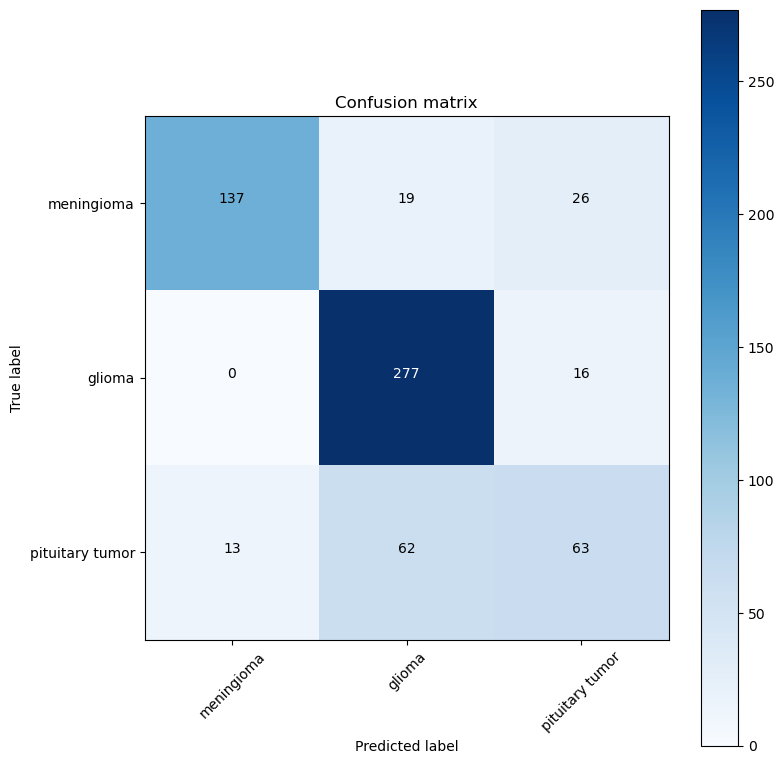

In [45]:
cnf_matrix = confusion_matrix(actual_label, predicted_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=[ 'meningioma','glioma','pituitary tumor'],
                      title='Confusion matrix')
plt.show()

In [46]:
# model = load_model("/kaggle/working/best_model_tumor_cnn.h5")

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

  "This ImageDataGenerator specifies "

/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

  "This ImageDataGenerator specifies "


Grad Cam Heatmap:


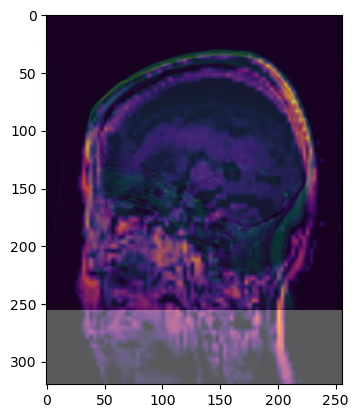

X-ray images:


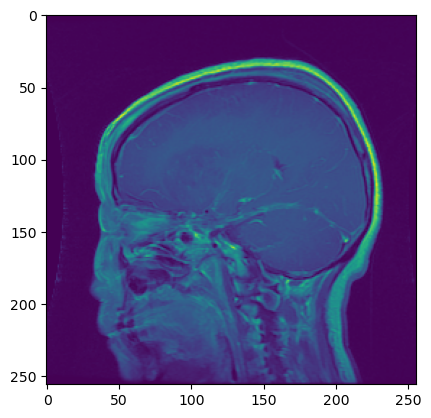











Grad Cam Heatmap:


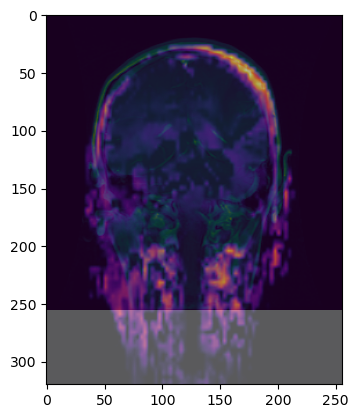

X-ray images:


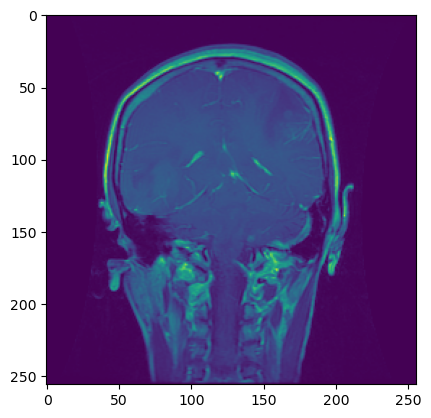











Grad Cam Heatmap:


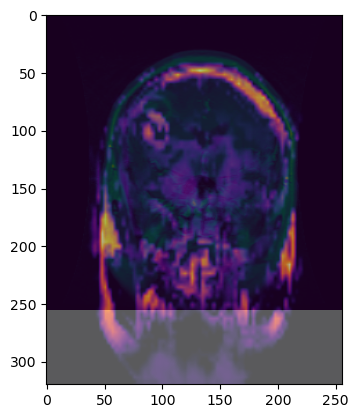

X-ray images:


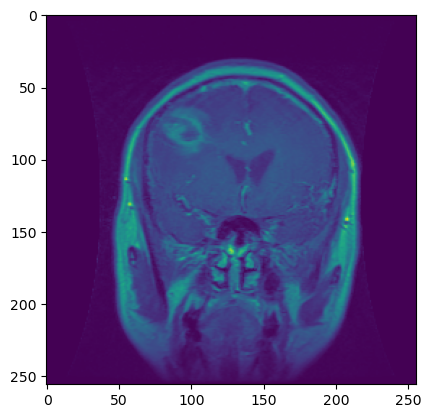











Grad Cam Heatmap:


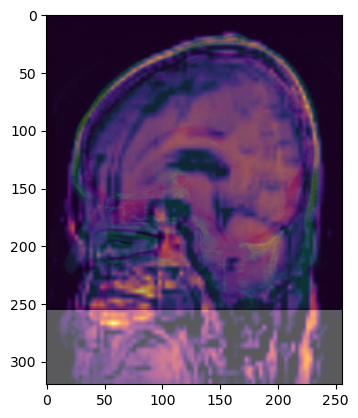

X-ray images:


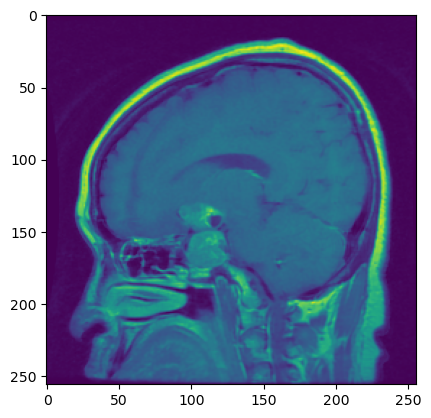











Grad Cam Heatmap:


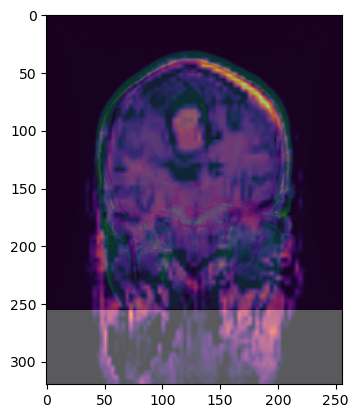

X-ray images:


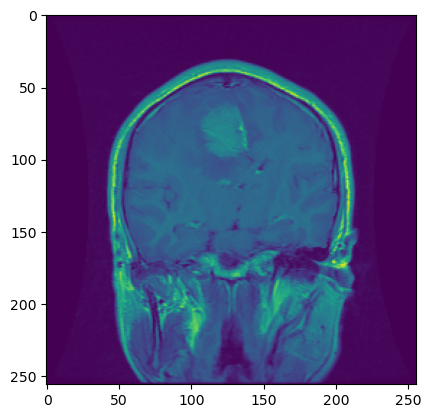











Grad Cam Heatmap:


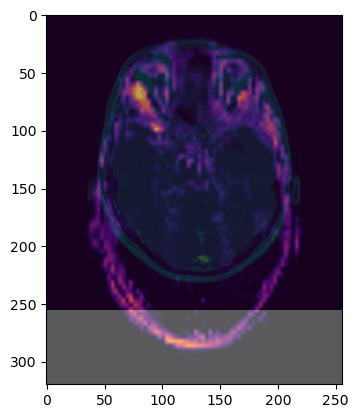

X-ray images:


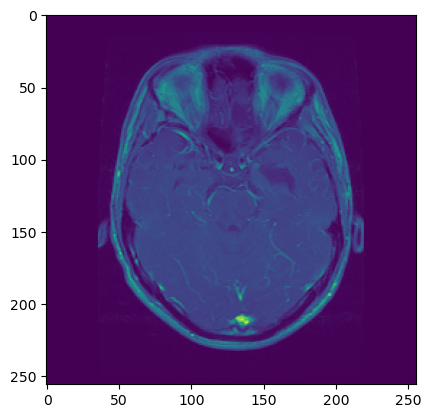











Grad Cam Heatmap:


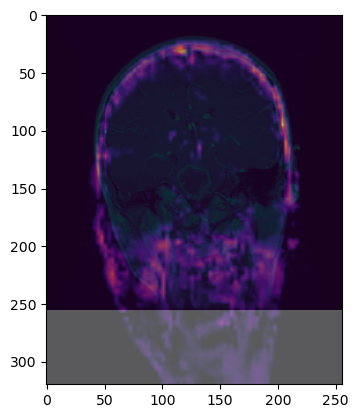

X-ray images:


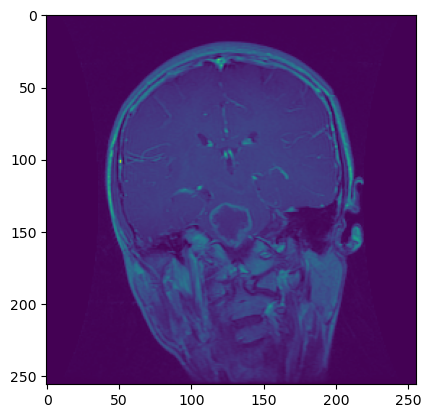











Grad Cam Heatmap:


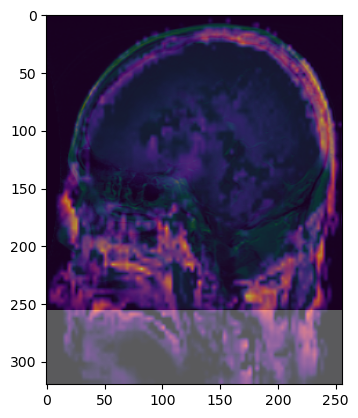

X-ray images:


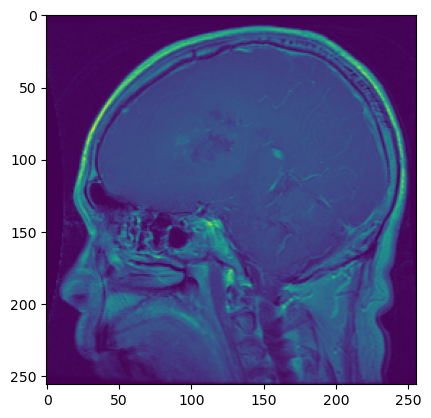











Grad Cam Heatmap:


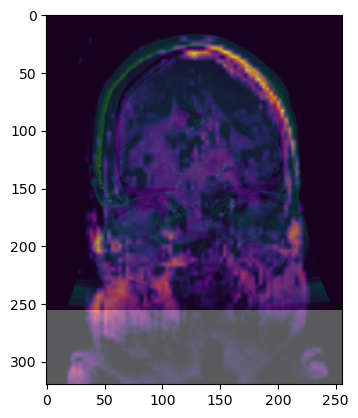

X-ray images:


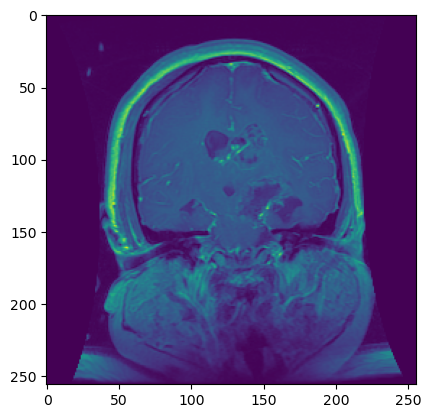











Grad Cam Heatmap:


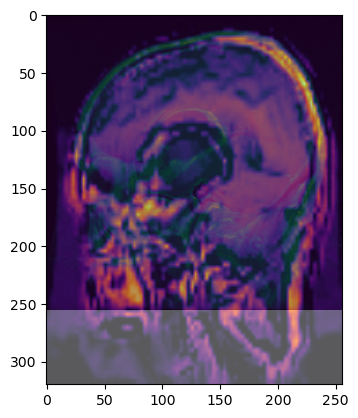

X-ray images:


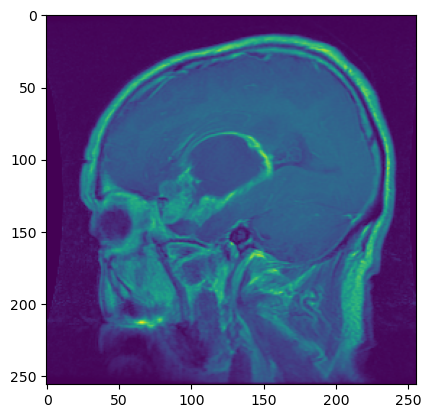

In [47]:
# Remove last layer's sigmoid
model.layers[-1].activation = None

for i in range(10):
    img_array = next(test_img_gen)[0]
    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, "activation_2")
    print("Grad Cam Heatmap:")
    plt.imshow(img_array[0])
    plt.imshow(heatmap, alpha = 0.65, cmap = "inferno")
    plt.show()
    print("X-ray images:")
    plt.imshow(img_array[0])
    plt.show()
    print("\n\n\n\n")

**References:**
<br>
Some parts of this code and applied methods are taken from our previous project work  at ENEL645.
<br>
Also, have taken some references from other Kaggle public notebooks.

**THANK YOU**